# Importing Libraries

In [1]:
# Nessesary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

# Importing the Data

In [2]:
data = pd.read_excel("C:/Users/TUSHAR/Desktop/Hospital Data.xlsx")

In [3]:
data

,ID,Age,AgeGroup,Gender,BloodPressure,Hemoglobin,BloodGlucose,SugarLevel,Arthritis,BreathingProblem,Diagnosis,TypeofDisease,Medicine,TypeofMedicine,Locality,RecoveryTime
0,1,62,Adults,Female,70,12.60,122,Prediabetic,No,No,Dengue,Epidemic disease,"Inj C-Tri 1 gm ,NS 100ml",Antibiotic,Rural,0 to 48 Hours
1,2,43,Adults,Male,60,17.80,174,High,No,No,Chikungunya,Epidemic disease,"Inj C-Tri 1 gm, NS 100ml ,Tab HCQS 200",Antibiotic,Rural,0 to 48 Hours
2,3,62,Adults,Female,70,12.60,122,Prediabetic,No,No,Dengue,Epidemic disease,"Inj C-Tri 1 gm ,NS 100ml",Antibiotic,Rural,0 to 48 Hours
3,4,43,Adults,Male,60,17.80,165,High,No,No,Chikungunya,Epidemic disease,"Inj C-Tri 1 gm, NS 100ml ,Tab HCQS 200",Antibiotic,Rural,0 to 48 Hours
4,5,56,Adults,Female,60,13.70,97,Normal,No,No,Viral Fever,Epidemic disease,"Inj C-Tri 1 gm, Tab-Montegress LC",Antibiotic,Rural,48 to 72 Hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2061,2,Children,Male,80,12.65,121,Prediabetic,No,No,Bacterial Infection,Communicable disease,Inj C-Tri 500 mg,Antibiotic,Rural,48 to 72 Hours
2061,2062,57,Adults,Female,60,15.40,132,High,No,Yes,dm type 2 COPD pulmonary emobolisum,Respiratory Disease,"beta-2 agonist, thephylline",Bronchodilators,Rural,More than 72 Hours
2062,2063,2,Children,Male,80,12.65,121,Prediabetic,No,No,Bacterial Infection,Communicable disease,Inj C-Tri 500 mg,Antibiotic,Rural,48 to 72 Hours
2063,2064,4,Children,Male,80,12.00,99,Normal,No,No,Bacterial Infection in Stomach,Abdominal disease,"Inj C-Tri 700 gm, Inj Ondem 0.7 ml",Antiemetic,Urban,48 to 72 Hours


# General Information of Data

In [4]:
data.shape

(2065, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2065 non-null   int64  
 1   Age               2065 non-null   int64  
 2   AgeGroup          2065 non-null   object 
 3   Gender            2065 non-null   object 
 4   BloodPressure     2065 non-null   int64  
 5   Hemoglobin        2065 non-null   float64
 6   BloodGlucose      2065 non-null   int64  
 7   SugarLevel        2065 non-null   object 
 8   Arthritis         2065 non-null   object 
 9   BreathingProblem  2065 non-null   object 
 10  Diagnosis         2065 non-null   object 
 11  TypeofDisease     2065 non-null   object 
 12  Medicine          2065 non-null   object 
 13  TypeofMedicine    2065 non-null   object 
 14  Locality          2065 non-null   object 
 15  RecoveryTime      2065 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory

# Removing unnecessary columns

In [6]:
data = data.drop(["ID","Diagnosis","Medicine"],axis=1)

In [7]:
data.head(5)

,Age,AgeGroup,Gender,BloodPressure,Hemoglobin,BloodGlucose,SugarLevel,Arthritis,BreathingProblem,TypeofDisease,TypeofMedicine,Locality,RecoveryTime
0,62,Adults,Female,70,12.6,122,Prediabetic,No,No,Epidemic disease,Antibiotic,Rural,0 to 48 Hours
1,43,Adults,Male,60,17.8,174,High,No,No,Epidemic disease,Antibiotic,Rural,0 to 48 Hours
2,62,Adults,Female,70,12.6,122,Prediabetic,No,No,Epidemic disease,Antibiotic,Rural,0 to 48 Hours
3,43,Adults,Male,60,17.8,165,High,No,No,Epidemic disease,Antibiotic,Rural,0 to 48 Hours
4,56,Adults,Female,60,13.7,97,Normal,No,No,Epidemic disease,Antibiotic,Rural,48 to 72 Hours


# Basic Statistical Description and understanding of Dispersion of Data

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2065.0,20.537530,23.973190,1.0,2.0,7.0,44.00,90.0
BloodPressure,2065.0,63.235351,18.625330,50.0,50.0,50.0,80.00,180.0
Hemoglobin,2065.0,11.777094,1.822262,4.8,11.3,11.3,12.65,17.8
BloodGlucose,2065.0,121.106053,19.180292,52.0,121.0,121.0,121.00,234.0


# Checking for Null Values

In [9]:
data.isnull().sum()

Age                 0
AgeGroup            0
Gender              0
BloodPressure       0
Hemoglobin          0
BloodGlucose        0
SugarLevel          0
Arthritis           0
BreathingProblem    0
TypeofDisease       0
TypeofMedicine      0
Locality            0
RecoveryTime        0
dtype: int64

There are no null values present in the data.

# Checking for Outliers

<AxesSubplot:>

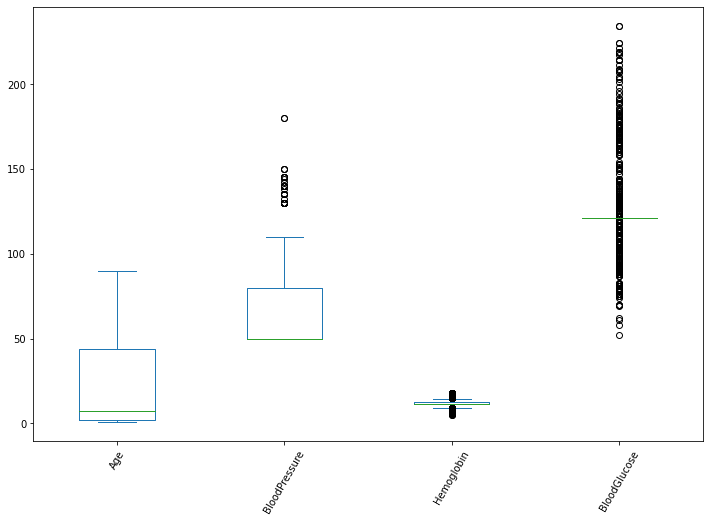

In [10]:
data.plot(kind ="box",figsize=(12,8),rot = 60)

Some of the above features has outliers but removing them directly may not be good for the analysis, because it may has some significance. 

# Count Plot

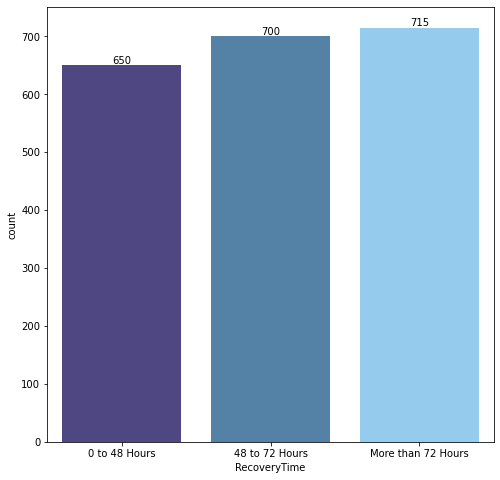

In [11]:
plt.figure(figsize=(8,8))
colors=["#483D8B","#4682B4", "#87CEFA"]
ax = sns.countplot(data = data, x="RecoveryTime", palette=colors)
ax.bar_label(ax.containers[0])
plt.show()

From the above count plot, we can see that target labels are nearly balanced.

# STATISTICAL TESTING

# Chi-Squared Test

# 1.Between Age Group and Recovery Time

In [12]:
df_table = pd.crosstab(data["AgeGroup"],data["RecoveryTime"])
print(df_table)

RecoveryTime  0 to 48 Hours  48 to 72 Hours  More than 72 Hours
AgeGroup                                                       
Adults                  171             208                 167
Children                412             421                 509
Seniors                  53              51                  30
Youth                    14              20                   9


In [13]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:4,0])
no_columns = len(df_table.iloc[0,0:3])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 11.121721493798695
Degrees of Freedom : 6
p-value : 0.08468654866659164


In [14]:
if p_value < alpha:
  print('Reject H0, Recovery Time may depends on Age Group.')
else:
  print('Accept H0, Recovery Time may not depends on Age Group.')

Accept H0, Recovery Time may not depends on Age Group.


# 2.Between Gender and Recovery Time

In [15]:
df_table = pd.crosstab(data["Gender"],data["RecoveryTime"])
print(df_table)

RecoveryTime  0 to 48 Hours  48 to 72 Hours  More than 72 Hours
Gender                                                         
Female                  256             272                 277
Male                    394             428                 438


In [16]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:2,0])
no_columns = len(df_table.iloc[0,0:3])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 0.04873068960025505
Degrees of Freedom : 2
p-value : 0.9759290939982338


In [17]:
if p_value < alpha:
  print('Reject H0, Recovery Time may depends on Gender.')
else:
  print('Accept H0, Recovery Time may not depends on Gender.')

Accept H0, Recovery Time may not depends on Gender.


# 3.Between Sugar Level and Recovery Time

In [18]:
df_table = pd.crosstab(data["SugarLevel"],data["RecoveryTime"])
print(df_table)

RecoveryTime  0 to 48 Hours  48 to 72 Hours  More than 72 Hours
SugarLevel                                                     
High                     72              84                  67
Low                       0               0                   5
Normal                   68              91                  50
Prediabetic             510             525                 593


In [19]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:3,0])
no_columns = len(df_table.iloc[0,0:3])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 11.376417535430404
Degrees of Freedom : 4
p-value : 0.022643947594058633


In [20]:
if p_value < alpha:
  print('Reject H0, Recovery Time may depends on Sugar Level.')
else:
  print('Accept H0, Recovery Time may not depends on Sugar Level.')

Reject H0, Recovery Time may depends on Sugar Level.


# 4.Between Breathing Problem and Recovery Time

In [21]:
df_table = pd.crosstab(data["BreathingProblem"],data["RecoveryTime"])
print(df_table)

RecoveryTime      0 to 48 Hours  48 to 72 Hours  More than 72 Hours
BreathingProblem                                                   
No                          613             658                 657
Yes                          37              42                  58


In [22]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:2,0])
no_columns = len(df_table.iloc[0,0:3])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 1.3861074772669553
Degrees of Freedom : 2
p-value : 0.5000467231461503


In [23]:
if p_value < alpha:
  print('Reject H0, Recovery Time may depends on Breathing Problem.')
else:
  print('Accept H0, Recovery Time may not depends on Breathing Problem.')

Accept H0, Recovery Time may not depends on Breathing Problem.


# 5.Between Type of Disease and Recovery Time

In [25]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:2,0])
no_columns = len(df_table.iloc[0,0:3])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 745.2438589820142
Degrees of Freedom : 2
p-value : 0.0


In [26]:
if p_value < alpha:
  print('Reject H0, Recovery Time may depends on Type of Disease.')
else:
  print('Accept H0, Recovery Time may not depends on Type of Disease.')

Reject H0, Recovery Time may depends on Type of Disease.


Conclusion: From the above Chi-Squared Tests, we can conclude that Recovery Time of patient depends on Sugar Level of patient and Type of Disease but it does not depend on Age Group, Gender and Breathing Problem.

# Encoding the Categorical Features

In [27]:
# Encoding the categorical variables

le = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [28]:
data.dtypes

Age                   int64
AgeGroup              int32
Gender                int32
BloodPressure         int64
Hemoglobin          float64
BloodGlucose          int64
SugarLevel            int32
Arthritis             int32
BreathingProblem      int32
TypeofDisease         int32
TypeofMedicine        int32
Locality              int32
RecoveryTime          int32
dtype: object

In [29]:
data.head(5)

,Age,AgeGroup,Gender,BloodPressure,Hemoglobin,BloodGlucose,SugarLevel,Arthritis,BreathingProblem,TypeofDisease,TypeofMedicine,Locality,RecoveryTime
0,62,0,0,70,12.6,122,3,0,0,6,6,0,0
1,43,0,1,60,17.8,174,0,0,0,6,6,0,0
2,62,0,0,70,12.6,122,3,0,0,6,6,0,0
3,43,0,1,60,17.8,165,0,0,0,6,6,0,0
4,56,0,0,60,13.7,97,2,0,0,6,6,0,1


# Correlation Matrix of the data

<AxesSubplot:>

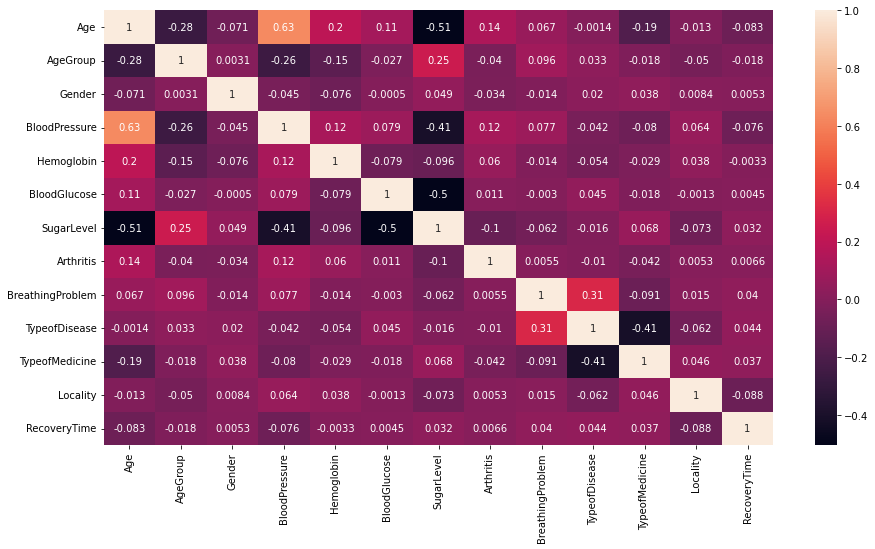

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

From the above correlation matrix, it is clear that "Age", "Blood Pressure", "Sugar Level", "Breathing Problem", "Type of Disease", "Type of Medicine", and "Locality" are the features having higher correlation with the Recovery Time.

In [31]:
data = data.drop(["AgeGroup"], axis =1)
data.head()

,Age,Gender,BloodPressure,Hemoglobin,BloodGlucose,SugarLevel,Arthritis,BreathingProblem,TypeofDisease,TypeofMedicine,Locality,RecoveryTime
0,62,0,70,12.6,122,3,0,0,6,6,0,0
1,43,1,60,17.8,174,0,0,0,6,6,0,0
2,62,0,70,12.6,122,3,0,0,6,6,0,0
3,43,1,60,17.8,165,0,0,0,6,6,0,0
4,56,0,60,13.7,97,2,0,0,6,6,0,1


# Balancing the Class Labels

In [32]:
data["RecoveryTime"].value_counts()

2    715
1    700
0    650
Name: RecoveryTime, dtype: int64

In [33]:
c_0,c_1,c_2=data["RecoveryTime"].value_counts()
c_2,c_1,c_0

(650, 700, 715)

In [34]:
data_0=data[data["RecoveryTime"]==0]
data_1=data[data["RecoveryTime"]==1]
data_2=data[data["RecoveryTime"]==2]

In [35]:
class_1over=data_1.sample(715,replace=True)

In [36]:
class_0over=data_0.sample(715,replace=True)

In [37]:
class012=pd.concat([class_1over,class_0over,data_2],axis=0)

In [38]:
class012["RecoveryTime"].value_counts()

1    715
0    715
2    715
Name: RecoveryTime, dtype: int64

In [39]:
class012=data

In [40]:
class_1under=data_1.sample(650,replace=True)

In [41]:
class_2under=data_2.sample(650,replace=True)

In [42]:
class012=pd.concat([class_1under,class_2under,data_0],axis=0)

In [43]:
class012["RecoveryTime"].value_counts()

1    650
2    650
0    650
Name: RecoveryTime, dtype: int64

In [44]:
#class012=data

# FEATURE SCALING

# Plotting Features using Boxen Plot 

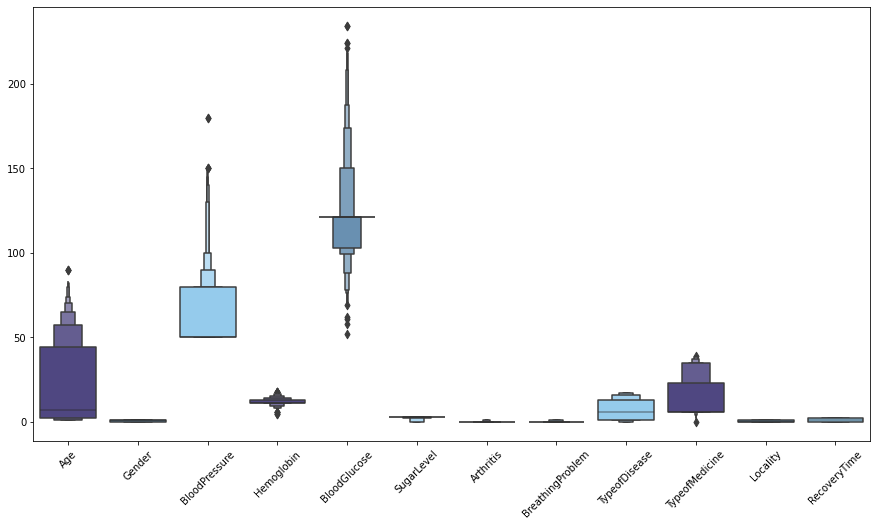

In [45]:
plt.figure(figsize=(15,8))
sns.boxenplot(data = data,palette = colors)
plt.xticks(rotation=45)
plt.show()

The above plot shows the range of features in the data. All the features are in different ranges. To fit this in a model we must scale it to the same range.

# Scaling the Data using Standard Scaler

In [46]:
# Defining independent and dependent features
X=data.drop(["RecoveryTime"],axis=1)
y=data["RecoveryTime"]

In [47]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2065.0,1.517215e-16,1.000242,-0.815172,-0.773448,-0.564831,0.978933,2.898208
Gender,2065.0,2.095714e-16,1.000242,-1.251086,-1.251086,0.799305,0.799305,0.799305
BloodPressure,2065.0,5.592513e-16,1.000242,-0.710782,-0.710782,-0.710782,0.900317,6.270650
Hemoglobin,2065.0,-1.105572e-15,1.000242,-3.829736,-0.261878,-0.261878,0.479139,3.305981
BloodGlucose,2065.0,5.926924e-16,1.000242,-3.603845,-0.005531,-0.005531,-0.005531,5.887360
SugarLevel,2065.0,1.208826e-15,1.000242,-2.712177,0.453818,0.453818,0.453818,0.453818
Arthritis,2065.0,2.105822e-15,1.000242,-0.238341,-0.238341,-0.238341,-0.238341,4.195665
BreathingProblem,2065.0,4.747346e-17,1.000242,-0.266567,-0.266567,-0.266567,-0.266567,3.751399
TypeofDisease,2065.0,7.529086e-16,1.000242,-1.190737,-1.016645,-0.146187,1.072456,1.768823
TypeofMedicine,2065.0,2.000337e-15,1.000242,-1.184896,-0.693914,-0.693914,0.697203,2.006489


# Plotting the Scaled Features using Boxen Plots

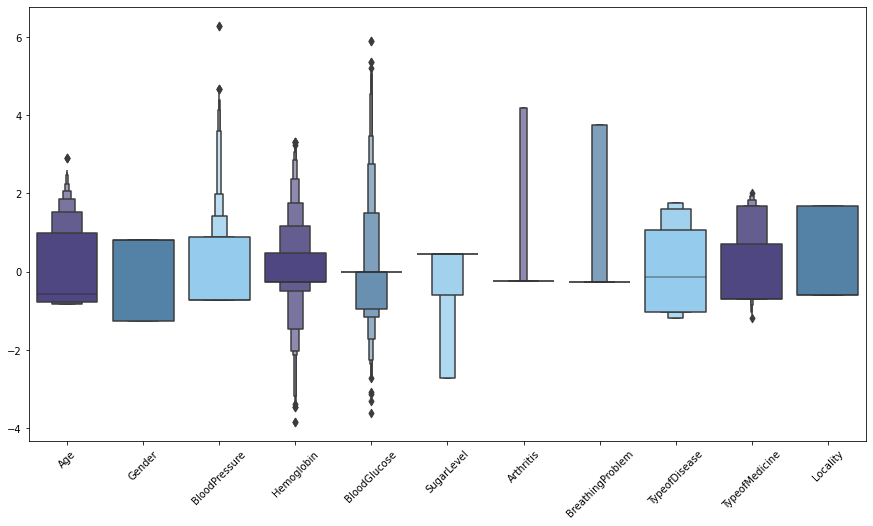

In [48]:
plt.figure(figsize=(15,8))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=45)
plt.show()

The plot clearly indicates that, now all the features are in same range since we have scaled the data.

# MODEL DEVELOPMENT

In [49]:
#Splitting the data into training set and test set

In [50]:
# Splitting the dataset into train and test

X = data.drop(['RecoveryTime'], axis=1)
y = data['RecoveryTime']
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=34)

In [51]:
X_train.shape,y_train.shape

((1652, 11), (1652,))

In [52]:
X_test.shape,y_test.shape

((413, 11), (413,))

In [53]:
# table of all models

models = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(), SGDClassifier(), Perceptron()]

model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost', 'KNN', 'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron']

accuracy = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Decision Tree,0.835351
1,Random Forest,0.835351
2,Gradient Boosting,0.748184
3,Ada Boost,0.697337
4,KNN,0.607748
5,SVC,0.445521
6,Naive Bayes,0.363196
7,SGD Classifier,0.360775
8,Perceptron,0.351090


# Decision Tree

In [54]:
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_p=dt.predict(X_test)

In [55]:
accuracy_score(y_test,dt_p)

0.8329297820823245

In [56]:
confusion_matrix(y_test,dt_p)

array([[110,  17,   0],
       [ 41,  95,   2],
       [  5,   4, 139]], dtype=int64)

In [57]:
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       127
           1       0.82      0.69      0.75       138
           2       0.99      0.94      0.96       148

    accuracy                           0.83       413
   macro avg       0.84      0.83      0.83       413
weighted avg       0.84      0.83      0.83       413



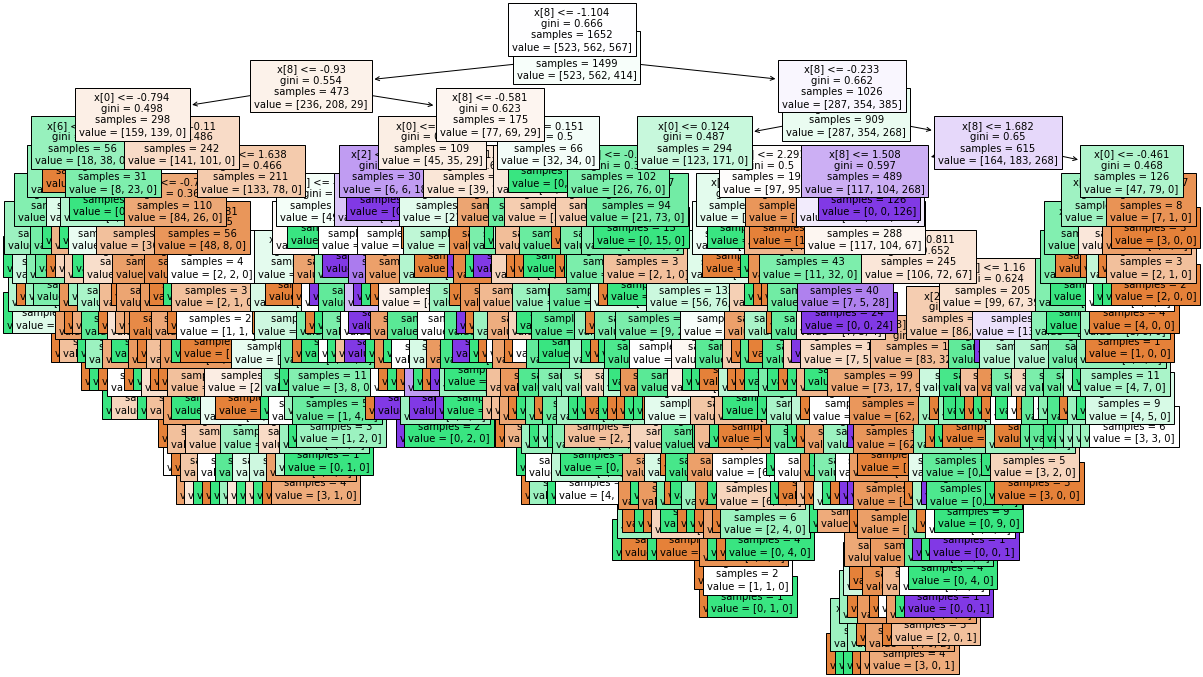

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,12))
from sklearn import tree
tr = tree.plot_tree(dt,filled=True,fontsize=10)

# Random Forest

In [59]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [60]:
accuracy_score(y_test, pred)

0.8498789346246973

In [61]:
confusion_matrix(y_test, pred)

array([[109,  18,   0],
       [ 29, 107,   2],
       [  6,   7, 135]], dtype=int64)

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       127
           1       0.81      0.78      0.79       138
           2       0.99      0.91      0.95       148

    accuracy                           0.85       413
   macro avg       0.85      0.85      0.85       413
weighted avg       0.86      0.85      0.85       413



# Gradient Boosting

In [63]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.7481840193704601

In [65]:
confusion_matrix(y_test,y_pred)

array([[ 78,  49,   0],
       [ 41,  97,   0],
       [ 12,   2, 134]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       127
           1       0.66      0.70      0.68       138
           2       1.00      0.91      0.95       148

    accuracy                           0.75       413
   macro avg       0.75      0.74      0.74       413
weighted avg       0.76      0.75      0.75       413



# Ada Boost

In [67]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)
adbo.fit(X_train,y_train)
adbo_p=adbo.predict(X_test)

In [68]:
accuracy_score(y_test,adbo_p)

0.8426150121065376

In [69]:
confusion_matrix(y_test, adbo_p)

array([[109,  18,   0],
       [ 33, 100,   5],
       [  5,   4, 139]], dtype=int64)

In [70]:
print(classification_report(y_test,adbo_p))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       127
           1       0.82      0.72      0.77       138
           2       0.97      0.94      0.95       148

    accuracy                           0.84       413
   macro avg       0.84      0.84      0.84       413
weighted avg       0.85      0.84      0.84       413



# Model Comparison

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


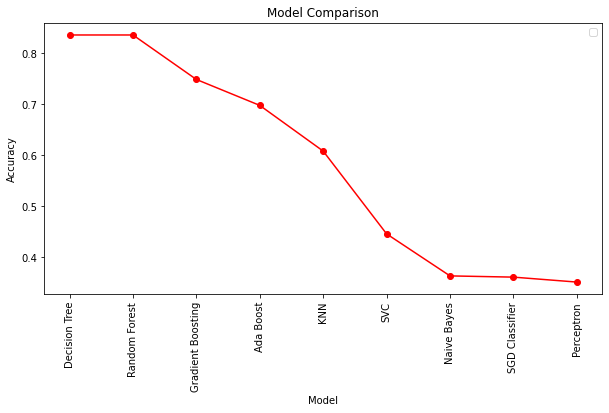

In [71]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [72]:
data.sample(5)

,Age,Gender,BloodPressure,Hemoglobin,BloodGlucose,SugarLevel,Arthritis,BreathingProblem,TypeofDisease,TypeofMedicine,Locality,RecoveryTime
109,64,1,90,12.20,102,3,0,1,6,6,0,1
700,3,1,50,11.30,121,3,0,0,1,35,1,1
1174,2,1,80,12.65,121,3,0,0,1,12,1,0
1200,56,0,80,13.50,100,3,0,0,6,6,1,0
1795,17,1,70,11.50,121,3,0,0,6,6,0,1


# Final Model (Prediction of Recovery Time of Patient)

In [73]:
Age = int(input("Age :"))
Gender = int(input("Gender :"))
BloodPressure = int(input("Blood Pressure :"))
Hemoglobin = float(input("Hemoglobin :"))
BloodGlucose = int(input("Blood Glucose :"))
SugarLevel = int(input("Sugar Level :"))
Arthritis = int(input("Arthritis :"))
BreathingProblem = int(input("Breathing Problem :"))
TypeofDisease = int(input("Type of Disease :"))
TypeofMedicine = int(input("Type of Medicine :"))
Locality = int(input("Locality :"))
prediction = model.predict([[Age, Gender, BloodPressure, Hemoglobin, BloodGlucose, SugarLevel, Arthritis, BreathingProblem, TypeofDisease, TypeofMedicine, Locality]])
if prediction == 0:
    print("Patient might recover within 48 hours.")
elif prediction == 1:
    print("Patient might recover in between 48 to 72 hours.")
else :
    print("Patient might take more than 72 hours to recover.")

Age :56
Gender :1
Blood Pressure :80
Hemoglobin :15.9
Blood Glucose :121
Sugar Level :3
Arthritis :0
Breathing Problem :0
Type of Disease :2
Type of Medicine :6
Locality :0
Patient might take more than 72 hours to recover.
